# Exploring Iris Dataset

![](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png)

>##### Here we're exploring basics of classification with the iris data set.

##### The first step is to use the scikit-learn python package to import the preloaded data sets.

In [2]:
from sklearn.datasets import load_iris
#data is saved as a variable
iris = load_iris()
#view data description and information
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

##### Putting Data into a Data Frame

In [3]:
import pandas as pd
data = pd.DataFrame(iris.data)
data.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


##### renaming the columns for clarity.

In [4]:
data.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
#put target data into data frame
target = pd.DataFrame(iris.target)
#rename the column to make it clear that these are the target values
target = target.rename(columns = {0: 'target'})
target.head()

,target
0,0
1,0
2,0
3,0
4,0


The target data frame is only one column, and it gives a list of the values 0, 1, and 2. We will use the information from the feature data to predict if a flower belongs in group 0, 1, or 2.
* 0 is Iris Setosa
* 1 is Iris Versicolour
* 2 is Iris Virginica

## 1. Exploratory Data Analysis (EDA)

In [6]:
df = pd.concat([data, target], axis = 1)

In [7]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### 1.1 Data Cleaning

##### It's critical to go over the data, make sure it's clean, and then start looking for patterns between characteristics and target variables.

In [9]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
target            int32
dtype: object

* float = numbers with decimals
* int = integer or whole number without decimals
* obj = object, string, or words

##### The data types in this data set are all ready to be modelled.

In [11]:
#Checking for Missing Values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
target          0
dtype: int64

##### This data set is not missing any values.

In [12]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## 2. Visualizing

<AxesSubplot:>

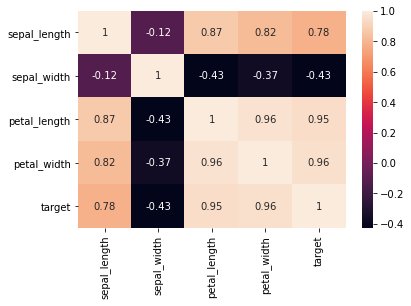

In [13]:
import seaborn as sns
sns.heatmap(df.corr(), annot = True)

* The target value is most correlated with the length and width of the petals, which means that as these numbers increase, so does the target value.
* In this case, it signifies that flowers in class 2 have petal length and width that are generally longer and wider than flowers in class 0.
* Sepal width is the most anti-correlated, implying that flowers in class 0 have the widest sepals compared to flowers in class 2.
* also see some intercorrelation between features, for example petal width and length are also highly correlated.

In [15]:
import matplotlib.pyplot as plt

##### we can plot scatter plots to further visualize the way the different classes of flowers relate to sepal and petal data.

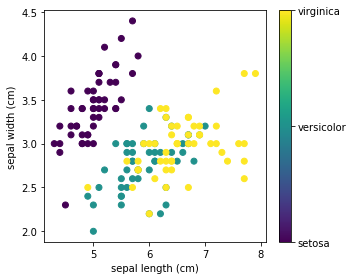

In [16]:
# The indices of the features that we are plotting (class 0 & 1)
x_index = 0
y_index = 1
# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])
plt.figure(figsize=(5, 4))
plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])
plt.tight_layout()
plt.show()

##### Now let’s create the same scatter plot to compare the petal data points.

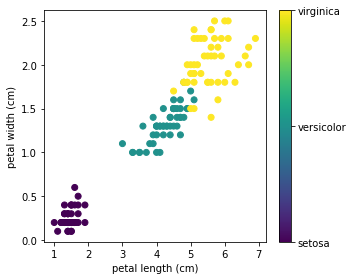

In [17]:
x_index = 2
y_index = 3
# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])
plt.figure(figsize=(5, 4))
plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])
plt.tight_layout()
plt.show()

## 3. Modeling

In [18]:
X = df.copy()
y = X.pop('target')

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify = y)

In [21]:
#Standardize
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

### 3.1 Baseline Prediction

##### The baseline is the probability of predicting class before the model is implemented. If the data is split into 2 classes evenly, there is already a 50% chance of randomly assigning an element to the correct class. The goal of our model is to improve on this baseline, or random prediction. Also, if there is a strong class imbalance (if 90% of the data was in class 1), then we could alter the proportion of each class to help the model predict more accurately.

In [23]:
df.target.value_counts(normalize= True)

0    0.333333
1    0.333333
2    0.333333
Name: target, dtype: float64

#### The baseline prediction for this model is 1/3

### 3.2 Logistic Regression Model

In [25]:
import numpy as np

In [27]:
from sklearn.linear_model import LogisticRegression
#create the model instance
model = LogisticRegression()
#fit the model on the training data
model.fit(X_train, y_train)
#the score, or accuracy of the model
model.score(X_test, y_test)

0.9666666666666667

In [28]:
#the test score is already very high, but we can use the cross validated score to ensure the model's strength 
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train, y_train, cv=10)
print(np.mean(scores))

0.9499999999999998


##### Without any adjustments or tuning, this model is already performing very well with a test score of .9667 and a cross validation score of .9499. This means that the model is predicting the correct class for the flower about 95% of time. Much higher than the baseline of 33%!

## 4. Understanding the Predictions

In [29]:
df_coef = pd.DataFrame(model.coef_, columns=X_train.columns)
df_coef

,sepal_length,sepal_width,petal_length,petal_width
0,-1.102746,1.001818,-1.836891,-1.667978
1,0.402982,-0.323432,-0.277761,-0.650011
2,0.699764,-0.678386,2.114653,2.317989


#### Coefficients are often a bit hard to interpret in Logistic Regression, but we can get an idea of how much of an impact each of the features had in deciding if a flower belonged to that class. For instance, petal length was barely a deciding factor for if a flower was in class 1, but petal width was a strong predictor for class 2

In [30]:
predictions = model.predict(X_test)
#compare predicted values with the actual scores
compare_df = pd.DataFrame({'actual': y_test, 'predicted': predictions})
compare_df = compare_df.reset_index(drop = True)
compare_df

,actual,predicted
0,2,2
1,0,0
2,1,1
3,0,0
4,0,0
5,0,0
6,2,2
7,2,2
8,2,2
9,1,1


The predictions line up almost perfectly, and only once the model incorrectly predicted that a flower belonged to class 1 when it really belonged to class 2.

In [31]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, predictions, labels=[2, 1, 0]),index=[2, 1, 0], columns=[2, 1, 0])

,2,1,0
2,9,1,0
1,0,10,0
0,0,0,10


##### We can see that class 0 and 1 were all predicted correctly all 10 times, but the model incorrectly labeled class 2 as class 1 in one instance.

* Precision: Number of correctly predicted Iris Virginica flowers (10) out of total number of predicted Iris Virginica flowers (10). Precision in predicting Iris Virginica =10/10 = 1.0
* Recall: Number of correctly predicted Iris Virginica out of the number of actual Iris Virginica. Recall = 9/10 = .9
* F1 Score: This is a harmonic mean of precision and recall. The formula is F1 Score = 2* (precision * recall) / (precision + recall)
* Accuracy: Add all the correct predictions together for all classes and divide by the total number of predictions. 29 correct predictions /30 total values = accuracy of .9667.

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [33]:
#Predicted Probabilities
probs = model.predict_proba(X_test)
#put the probabilities into a dataframe for easier viewing
Y_pp = pd.DataFrame(model.predict_proba(X_test), 
             columns=['class_0_pp', 'class_1_pp', 'class_2_pp'])
Y_pp.head()

,class_0_pp,class_1_pp,class_2_pp
0,0.000016,0.062182,9.378022e-01
1,0.958819,0.041181,5.060799e-07
2,0.147033,0.846368,6.598360e-03
3,0.983033,0.016967,2.623772e-07
4,0.970334,0.029663,2.118099e-06


## 5. Conclusion

##### This is a typical data set since it is simple to work with, but the steps outlined here may be applied to any classification project.

![](https://media.giphy.com/media/3o6MbudLhIoFwrkTQY/giphy.gif)

twitter: https://twitter.com/jithinharidaas/